In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

In [2]:
warnings.simplefilter('ignore')

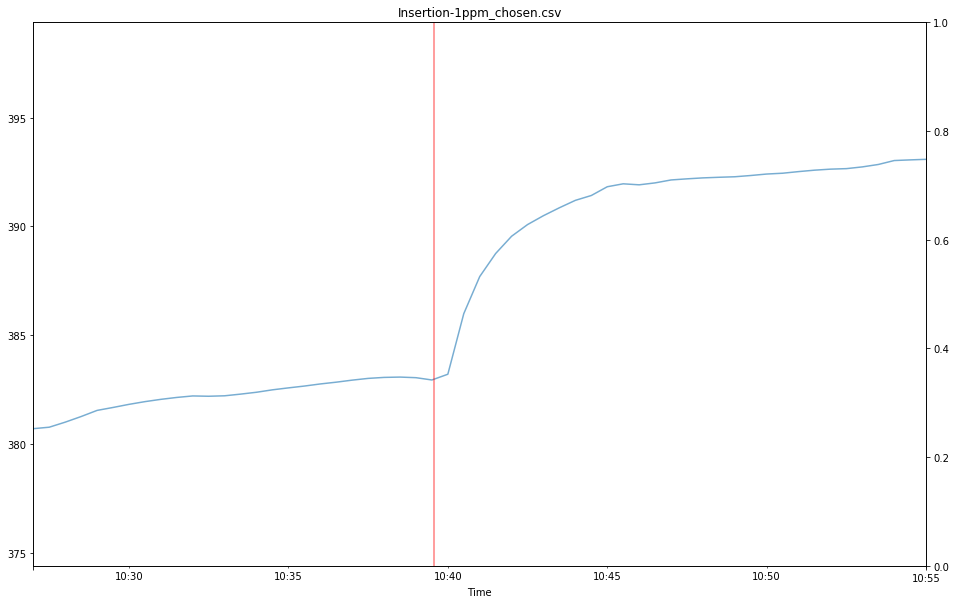

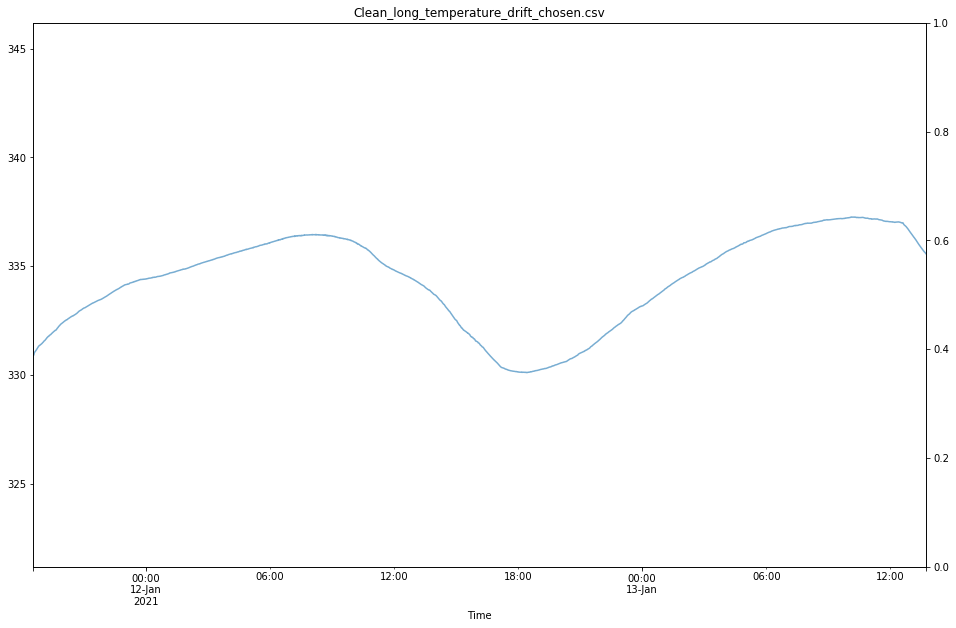

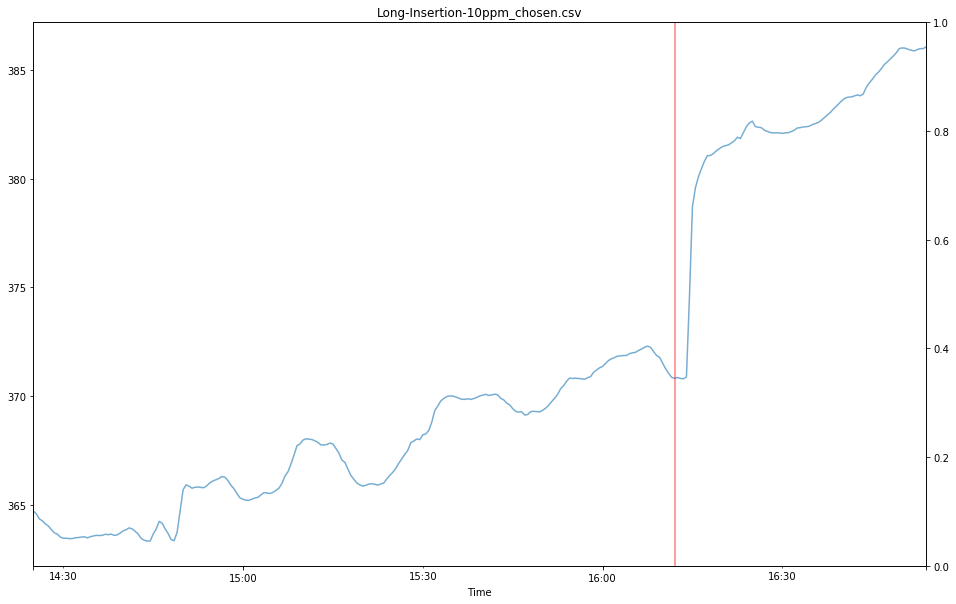

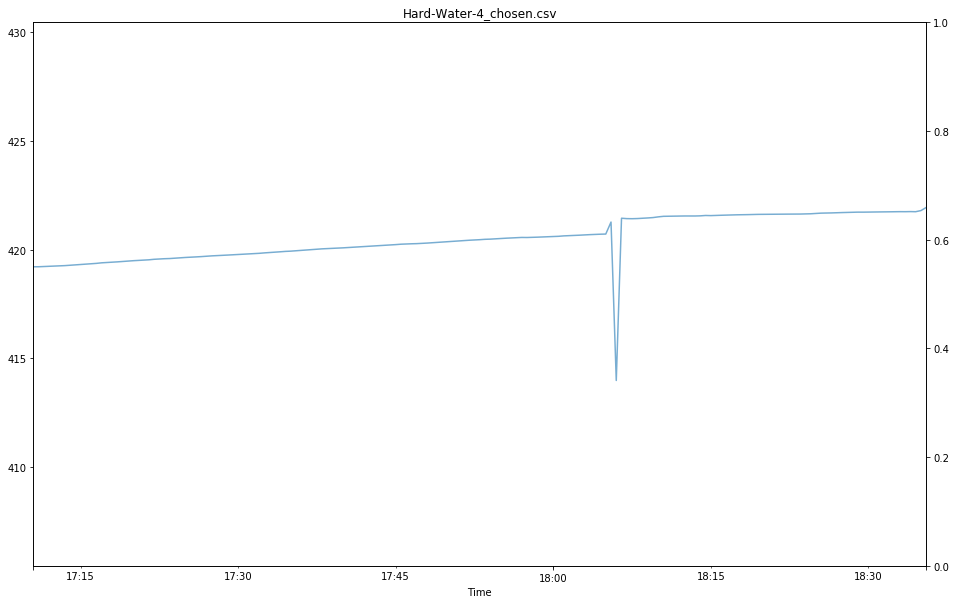

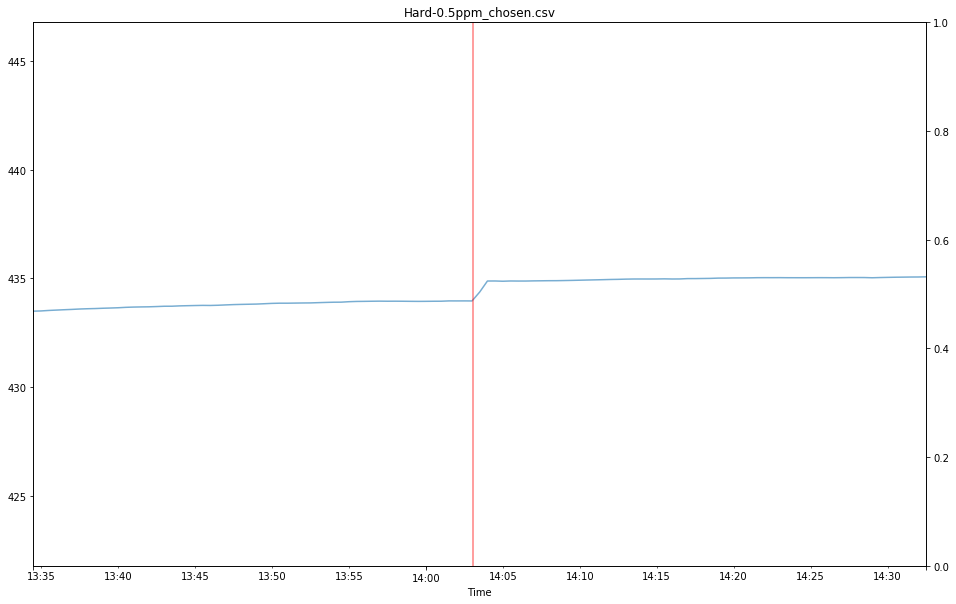

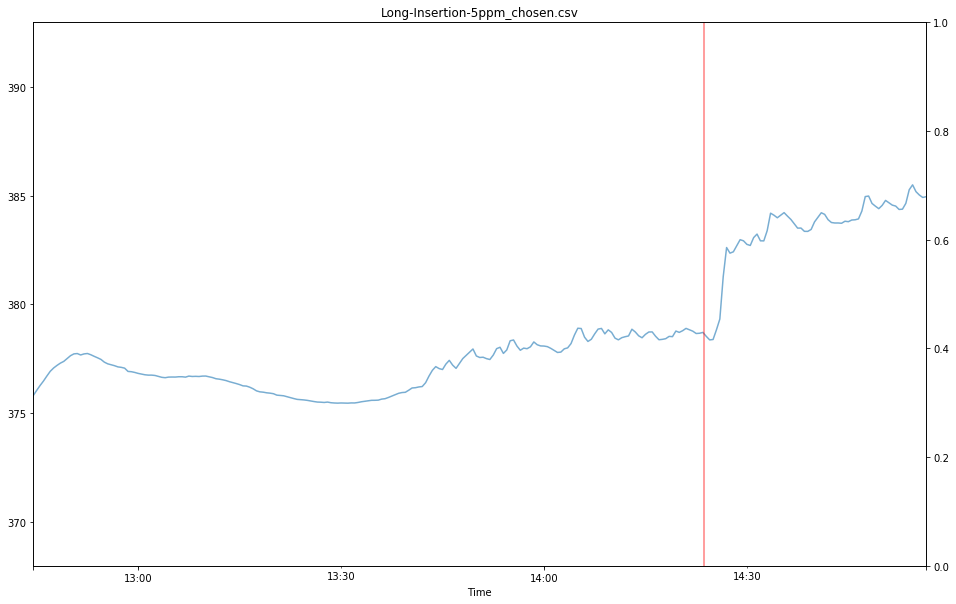

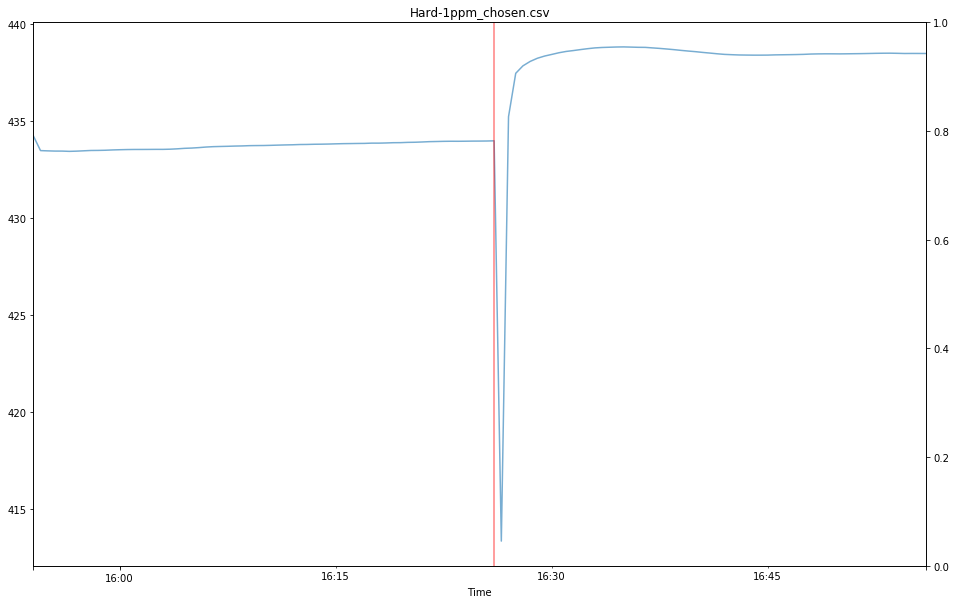

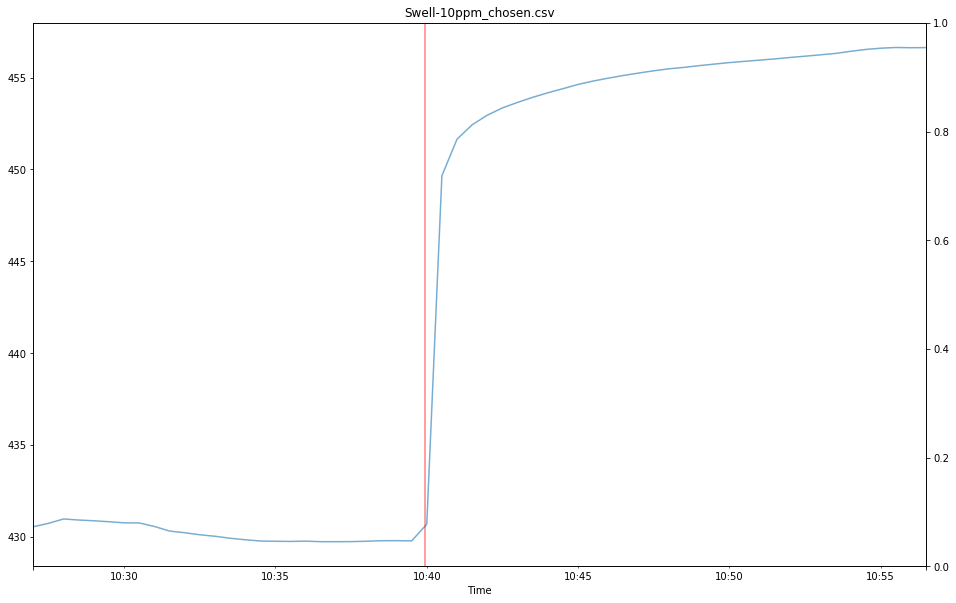

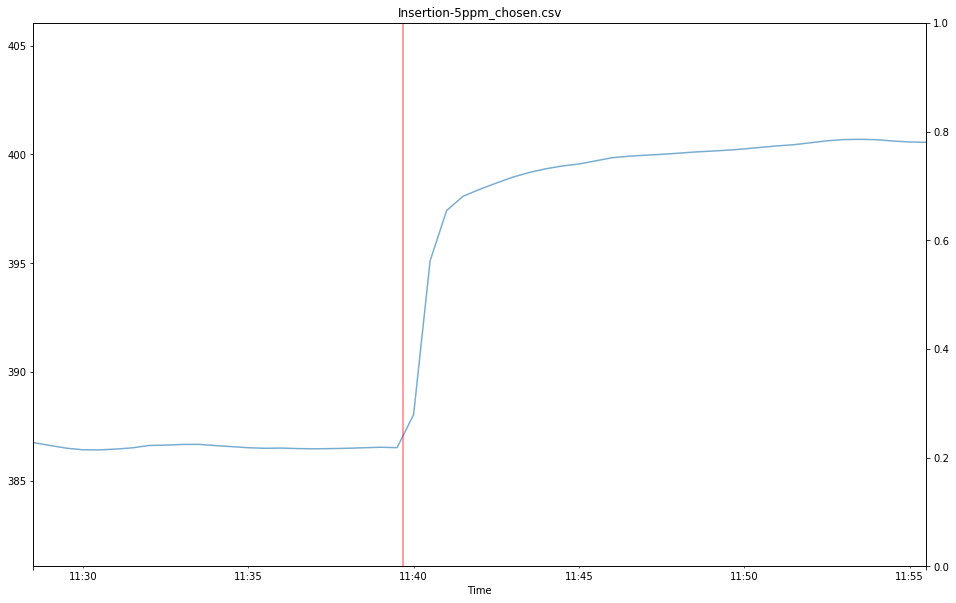

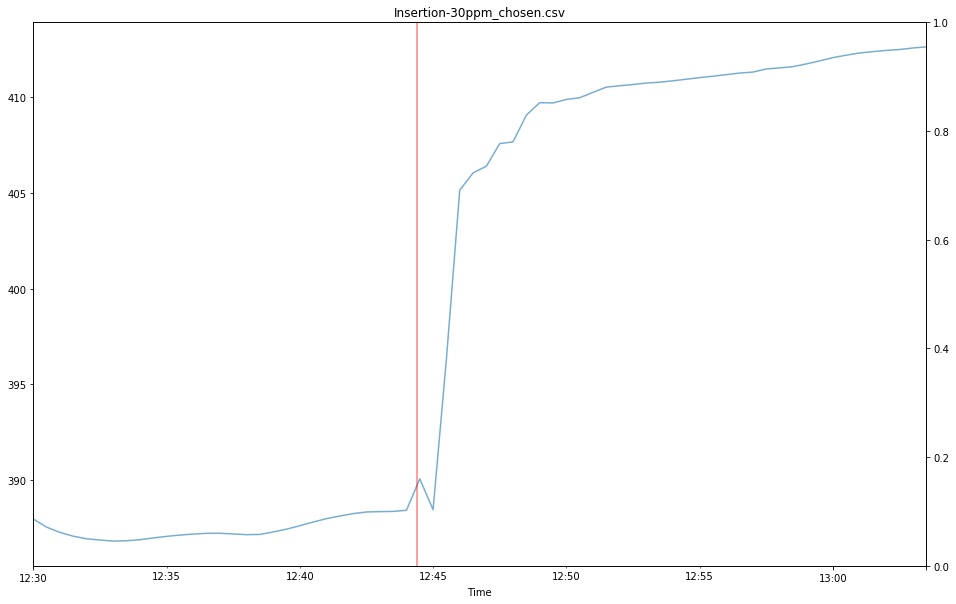

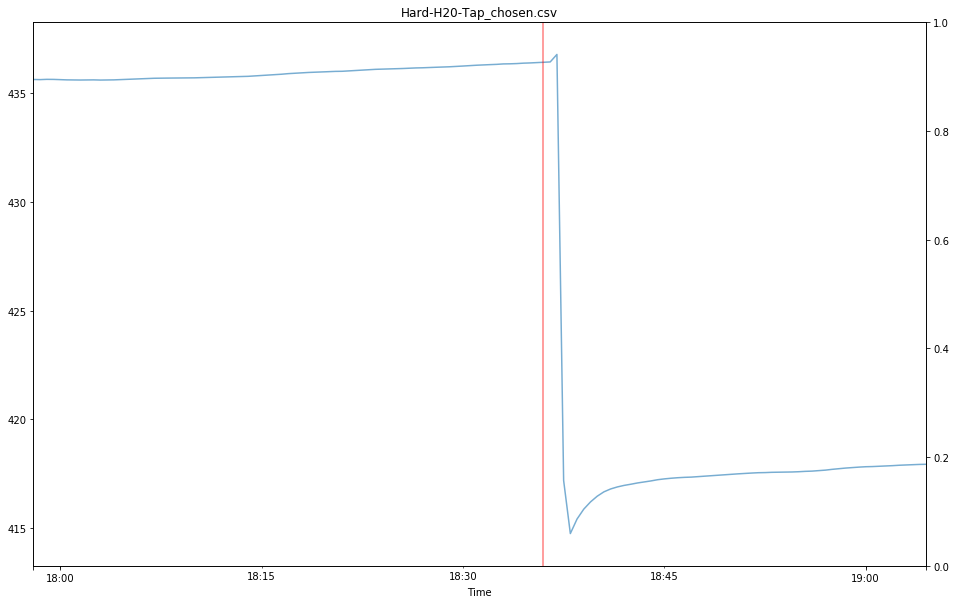

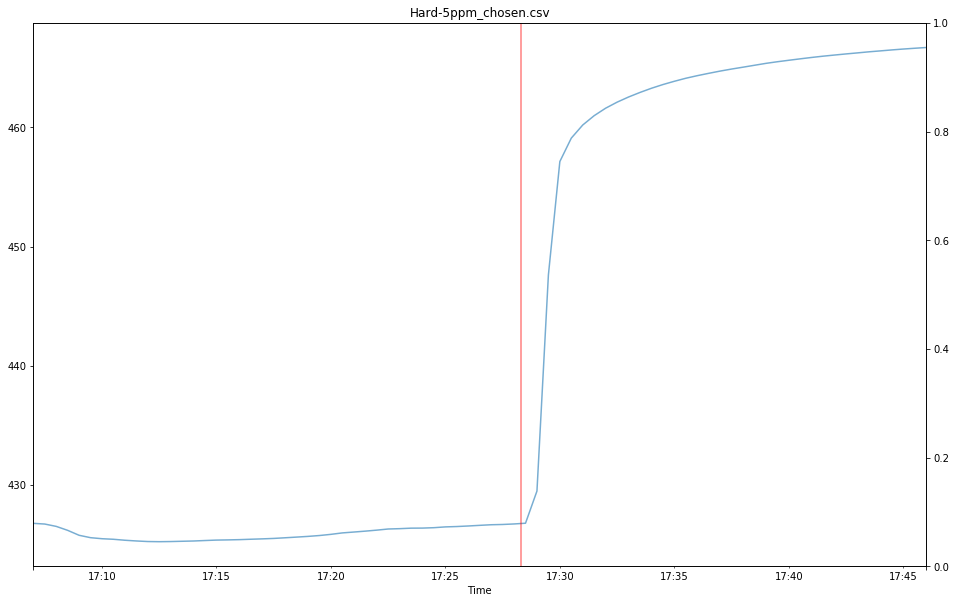

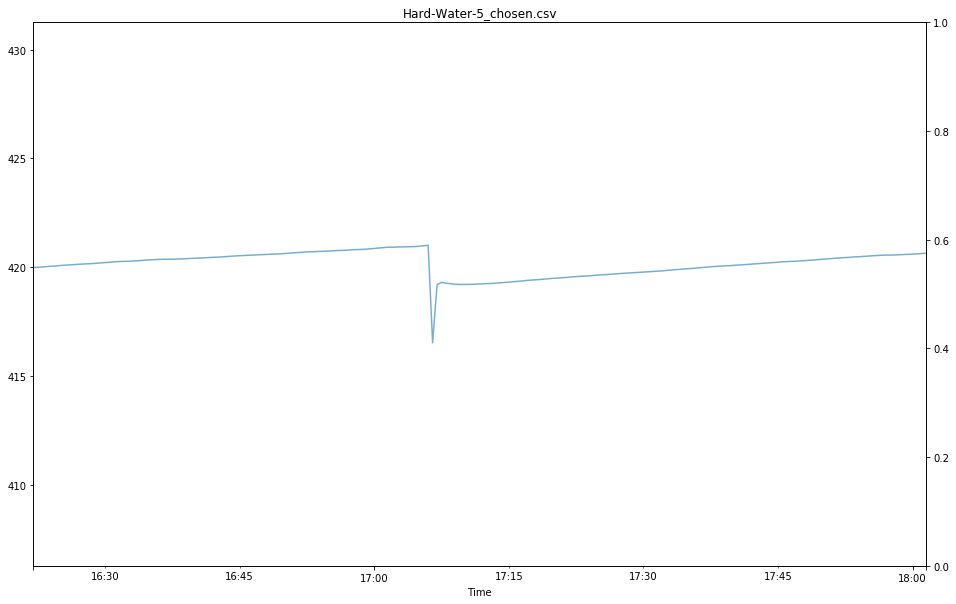

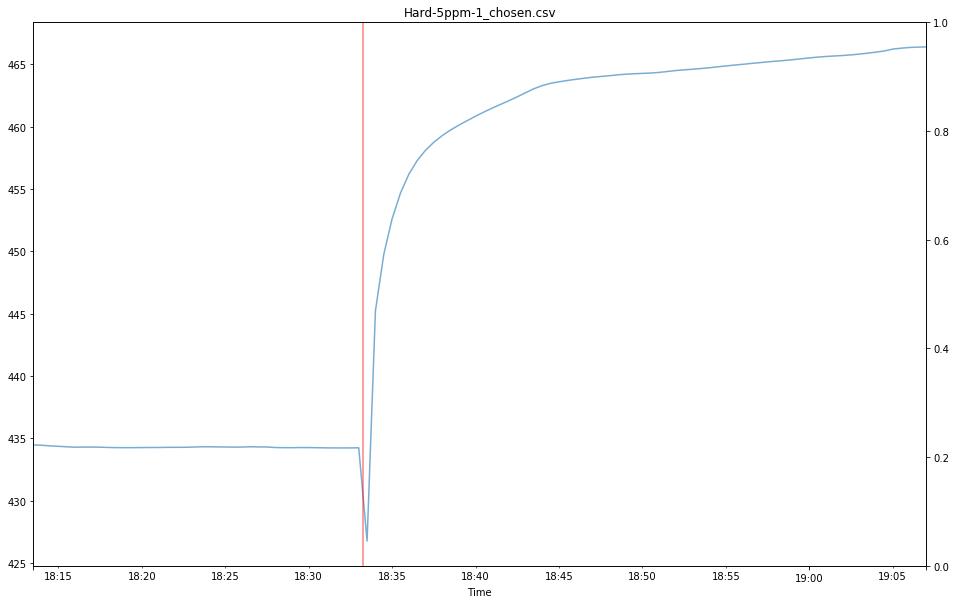

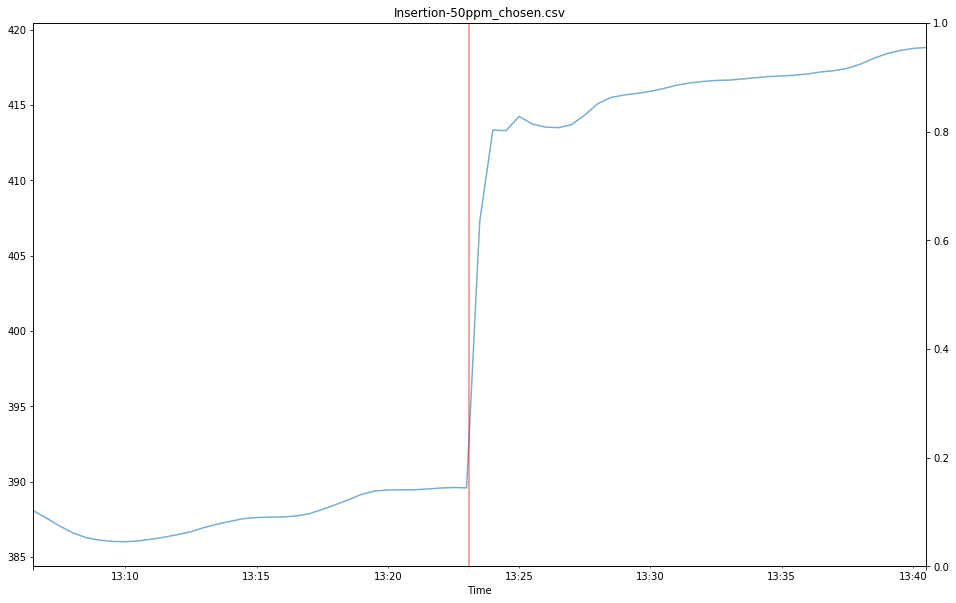

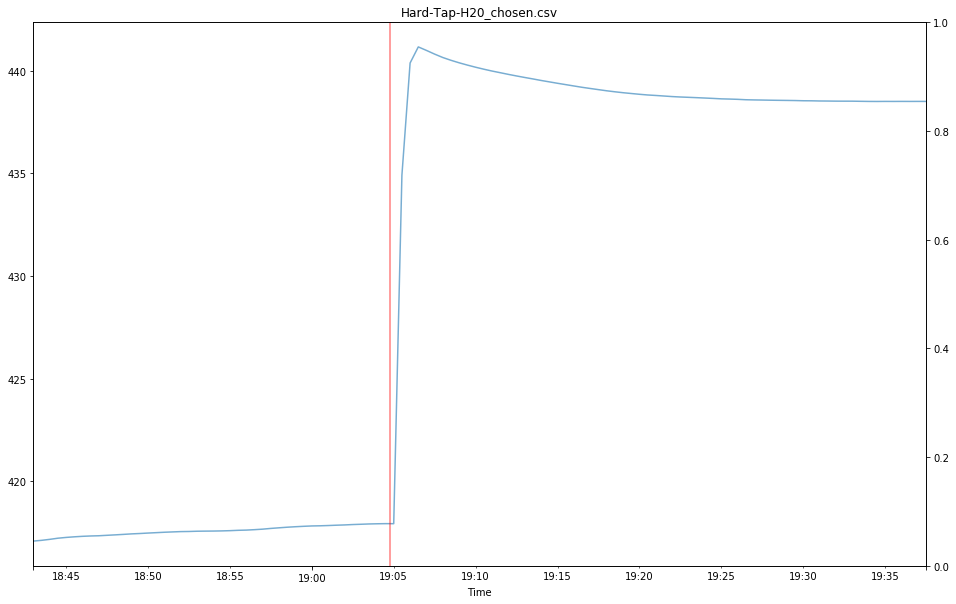

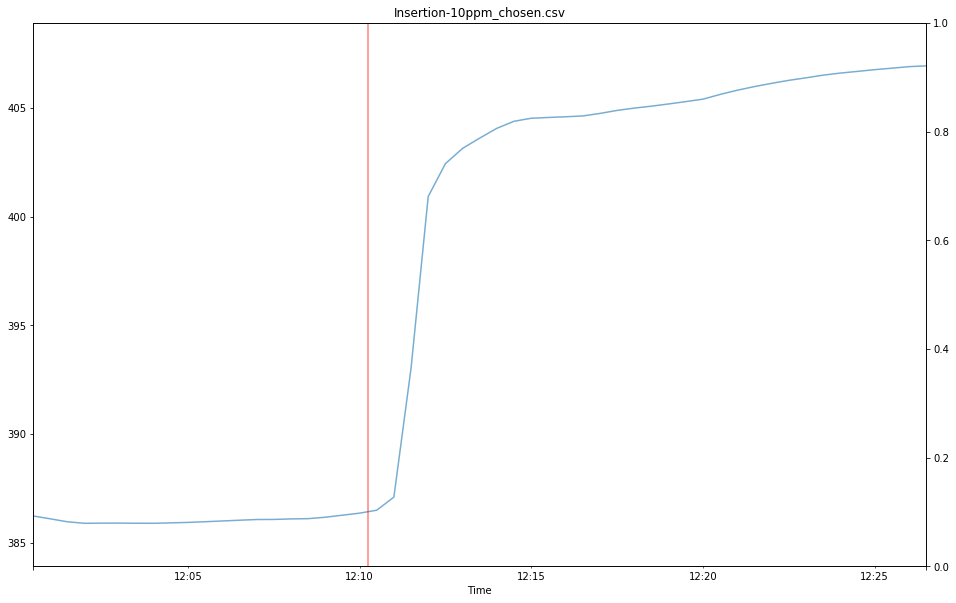

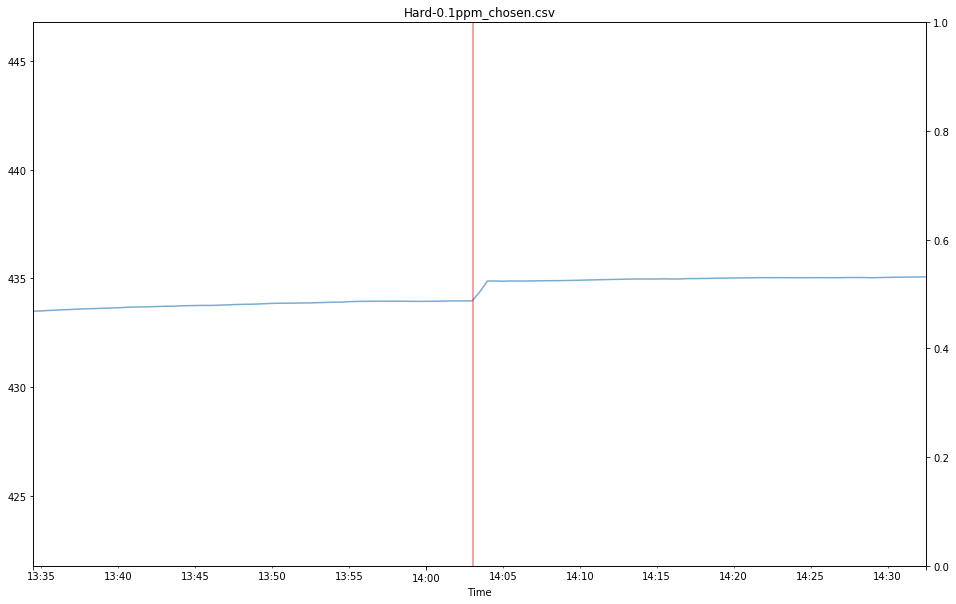

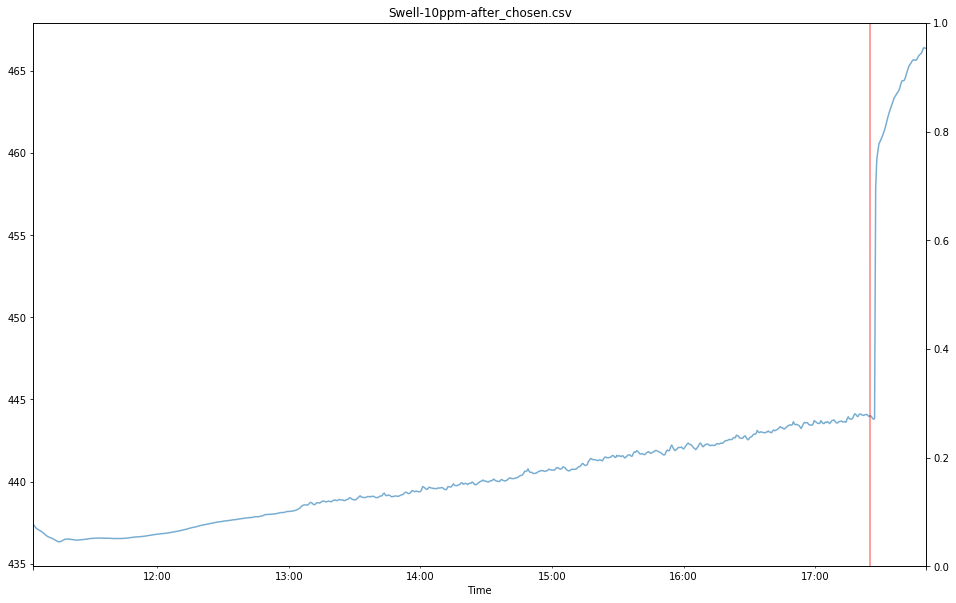

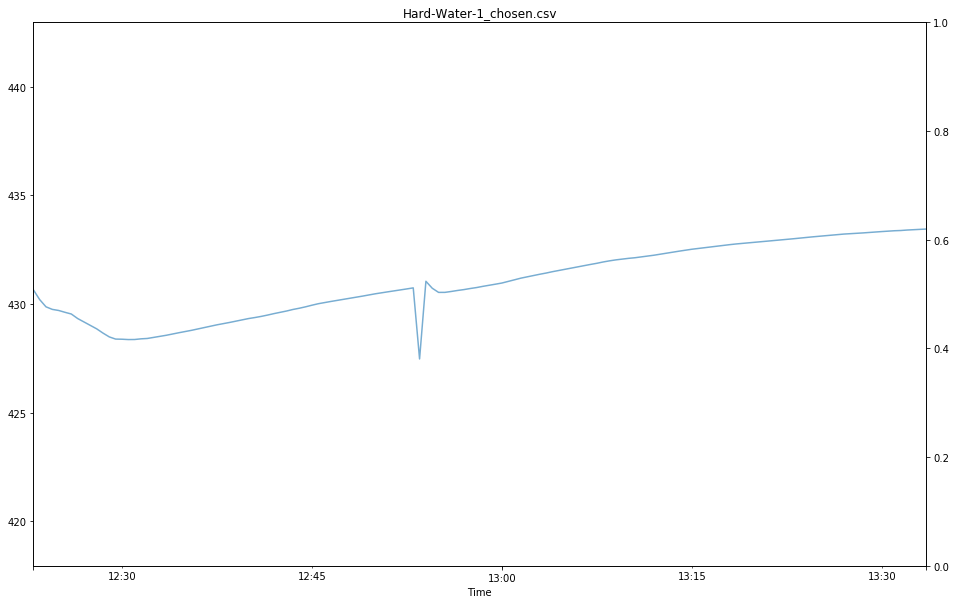

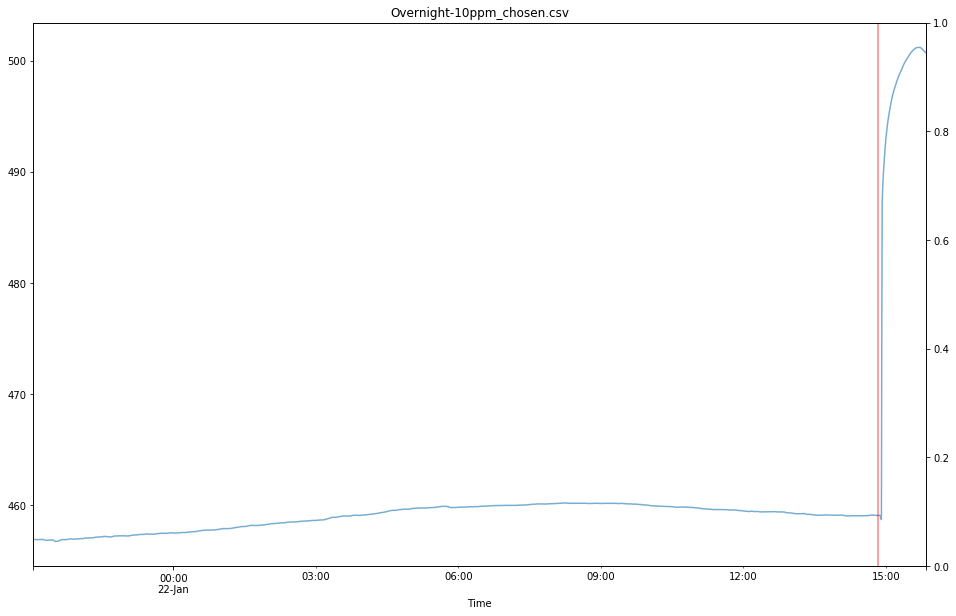

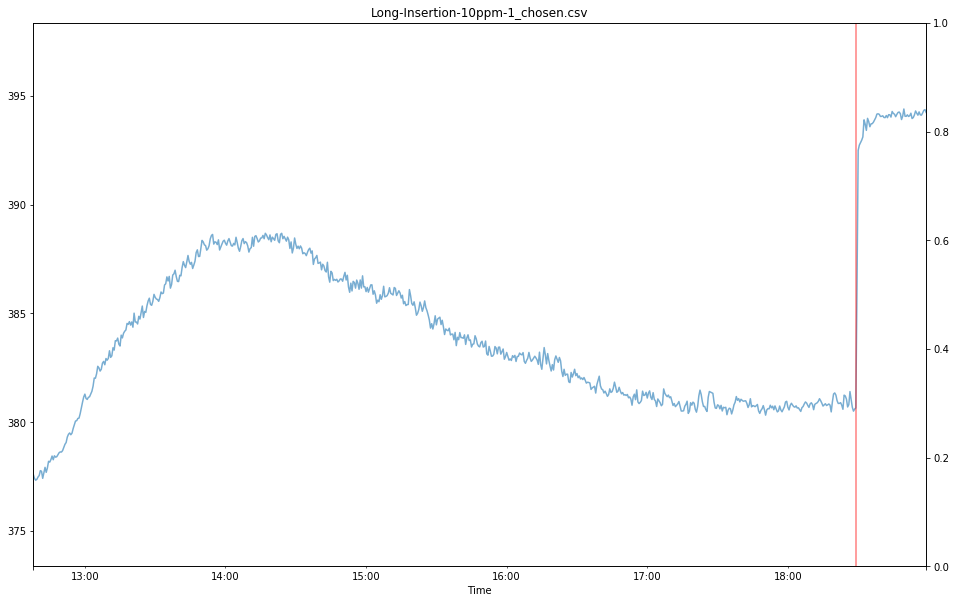

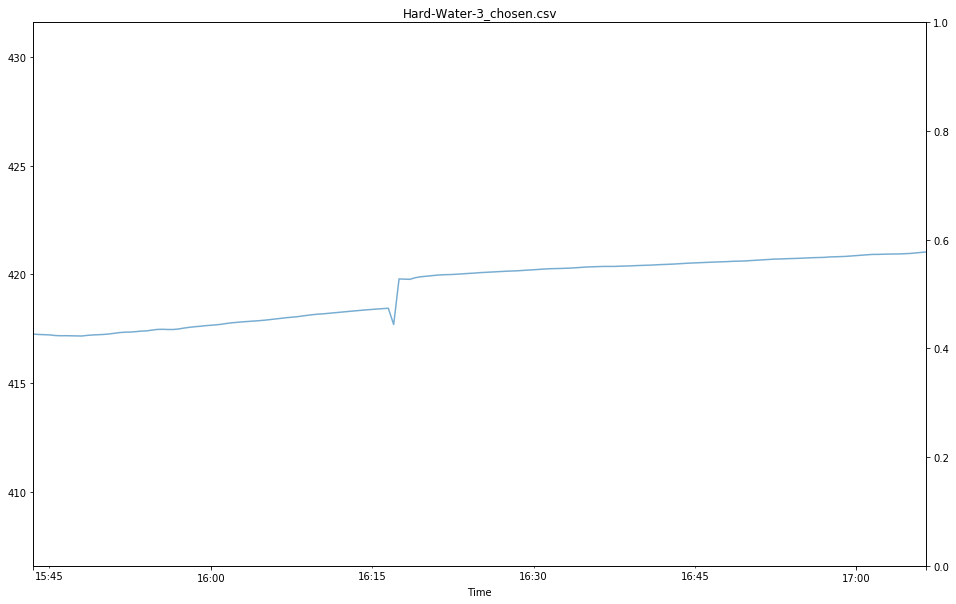

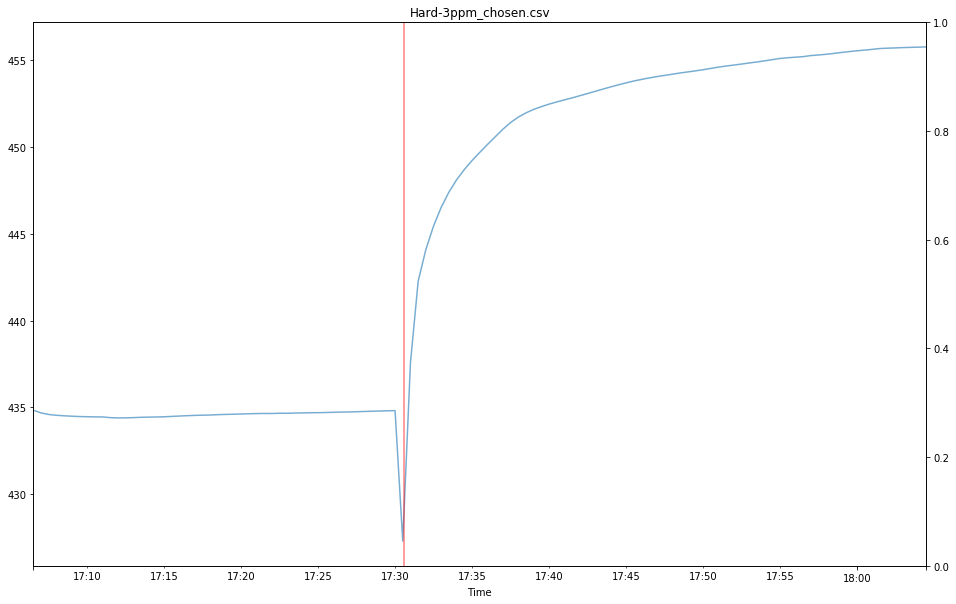

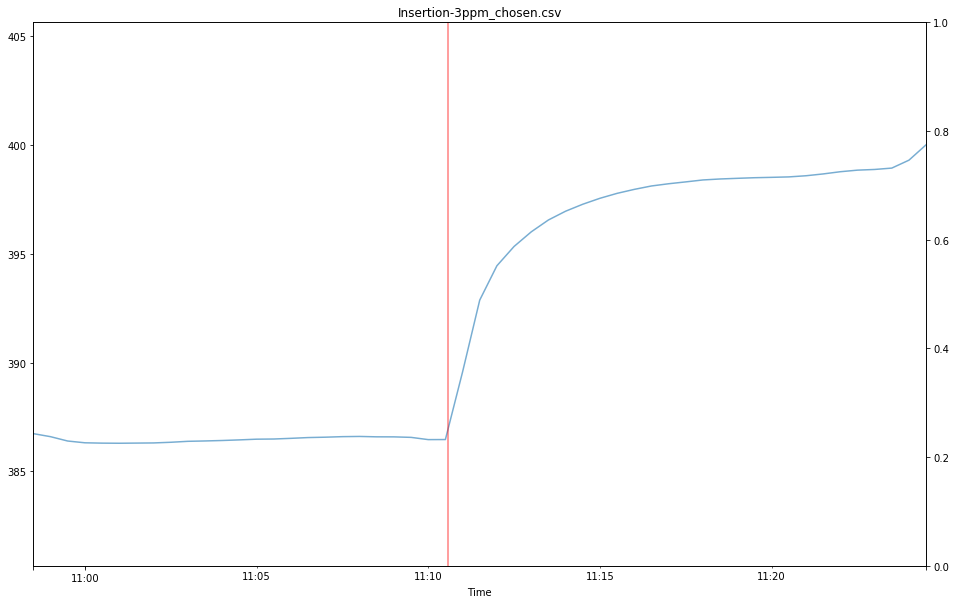

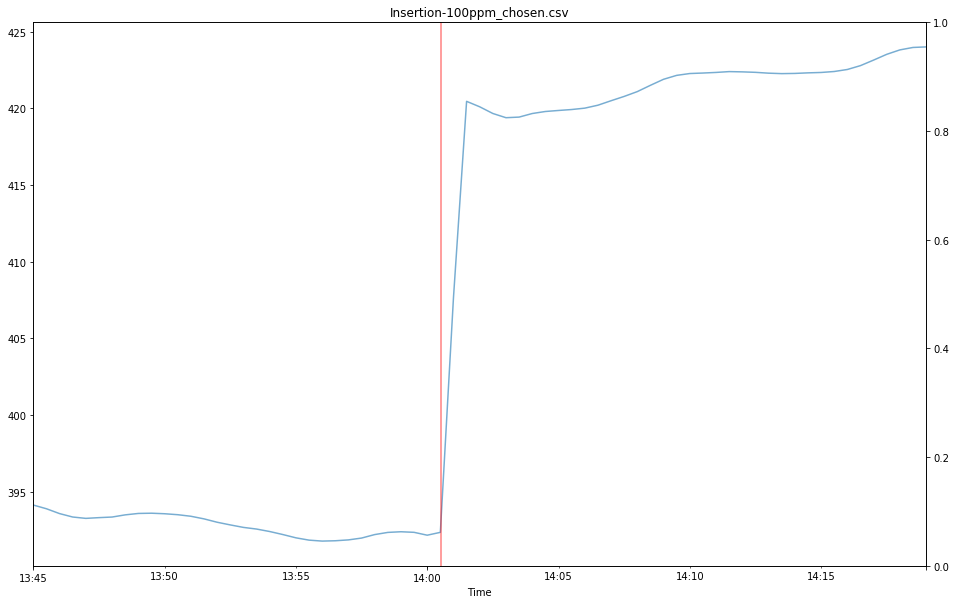

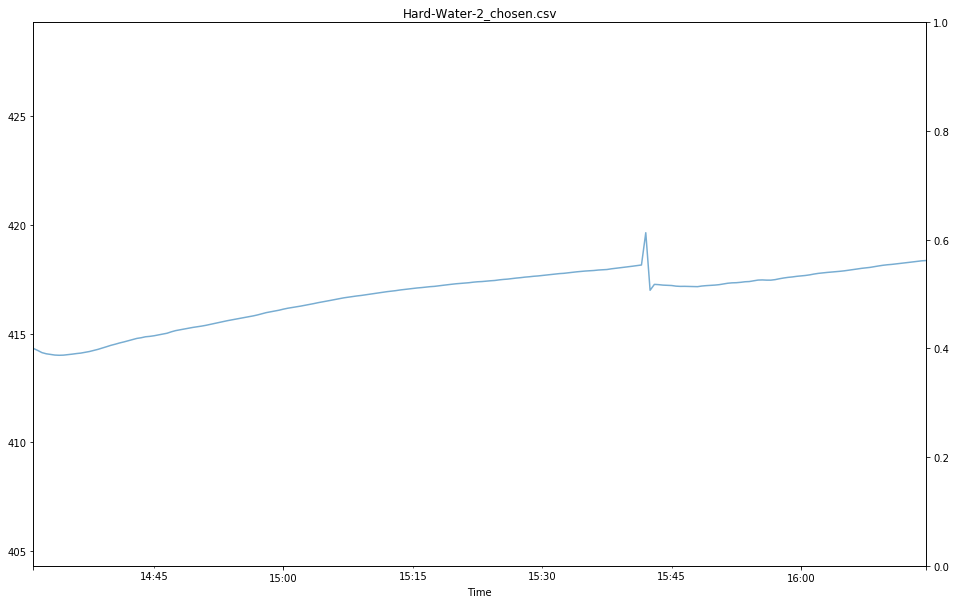

In [16]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    # if 'long' not in test_object['Path'] and 'Long' not in test_object['Path']:
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time', dayfirst=True
    )
    resampled = test_df.resample('30s').mean()
    
    fig, ax = plt.subplots(figsize=(16,10), frameon = False)
    tax = ax.twinx()
    resampled['Resistance'].plot(ax = ax, alpha = 0.6, stacked = False)
    res_min, res_max =  ax.get_ylim()
    min_pad = 25
    if res_max -  res_min < min_pad:
        mean_res = np.mean([res_max, res_min])
        ax.set_ylim([mean_res - min_pad/2, mean_res + min_pad/2])
    # resampled['Frequency'].plot(ax = tax, alpha = 0.6, stacked = False)
    for anomaly in test_object['Anomalies']:
        ax.axvline(x = test_df.iloc[anomaly['Start']].name, color = 'r', alpha = 0.5)
    # for anomaly in test_object['Anomalies']:
    #     start = test_df.iloc[anomaly['Start']].name
    #     end = test_df.iloc[anomaly['Start']+600].name
    #     print(start, end)
    #     ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.savefig(f"{test_object['Path'].split('/')[-1].split('.')[-2]}.png", pad_inches=0, bbox_inches = 'tight')
    plt.show()

Timestamp('2020-12-16 10:33:42.438410')